# Capstone Project
## By Theresia Novianne

### The News Classifier: Leveraging Machine Learning to Categorize Headlines

Dataset: https://www.kaggle.com/datasets/rmisra/news-category-dataset

Source: Huffington Post

The aim of this project is to classify news headlines into it's topic categories.

The data came from HuffPost’s website and accessed through Kaggle collected between 2012 to 2022 (Misra, 2022). The dataset contains 209,527 rows and 6 columns (link, headline, category, short_description, authors, date). The dataset had some content imbalances, where there are 200,000 headlines between 2012 and May 2018, and only 10,000 headlines between May 2018 and 2022.

### Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from collections import Counter
from nltk.corpus import stopwords
import regex as re
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json('News_Category_Dataset_v3.json', lines=True)

In [3]:
df

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors       date  
0       Carla K. Johnson, AP 2022-09-23  
1             Mary Papenfuss 2022-09-23  
2              Elyse Wanshel 2022-09-23  
3           Caroline Bologna 2022-09-23  
4             Nina Golgowski 2022-09-22  
...                      ...        ...  
209522      Reuters, Reuters 2012-01-28  
209523                       2012-01-28  
209524                       2012-01-28  
209525                       2012-01-28  
209526                       2012-01-28  

[209527 rows x 6 columns]

### Explore and Pre-process Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


For computing power reasons, 210,000 rows is a lot of data. We will be exploring 2 ways of shrinking the data size:
- Shrink the data size by date
- Shrink the data size by the number of categories

In [5]:
pd.set_option('display.max_rows', None) #help from Nick from his mini project 3
pd.set_option('display.max_columns', None)

date_counts = df['date'].value_counts()
print(date_counts)

date
2014-03-25    100
2013-10-25    100
2014-04-17    100
2013-02-04    100
2013-02-05    100
2013-02-06    100
2013-02-07    100
2013-02-08    100
2013-10-24    100
2013-02-01    100
2013-02-11    100
2013-02-12    100
2013-02-13    100
2013-02-14    100
2013-02-15    100
2013-10-23    100
2013-10-28    100
2013-01-31    100
2013-03-25    100
2013-01-22    100
2013-01-16    100
2013-01-17    100
2014-04-16    100
2017-03-16    100
2013-11-01    100
2013-10-31    100
2013-01-23    100
2013-01-30    100
2013-01-24    100
2013-01-25    100
2013-10-30    100
2013-10-29    100
2013-01-28    100
2013-01-29    100
2013-10-22    100
2013-10-21    100
2013-02-19    100
2013-10-14    100
2013-10-15    100
2013-03-11    100
2013-03-12    100
2013-03-13    100
2013-03-14    100
2013-03-15    100
2013-10-11    100
2013-02-20    100
2013-03-18    100
2013-03-19    100
2013-03-20    100
2013-03-21    100
2013-03-22    100
2013-10-10    100
2013-10-16    100
2013-03-08    100
2013-03-07    100
2013-

In [6]:
# Reset the display options to the default values if needed
pd.reset_option('display.max_rows') #help from Nick from his mini project 3
pd.reset_option('display.max_columns')

#### The data sorted by date is quite imbalanced. Some dates has 100 headlines while others only have 2. We will explore the category.

In [7]:
df['category'].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

#### 42 categories with at least 1000 headlines each is a better distribution. Below we explore some categories as the topics can be vague (eg. unsure what the category FIFTY means).

In [8]:
df[df['category'] == 'FIFTY'].sample(n=5, random_state=42)

link  \
123572  https://www.huffingtonpost.com/entry/obit-witc...   
118030  https://www.huffingtonpost.com/entry/breast-ca...   
60701   https://www.huffingtonpost.com/entry/dark-at-t...   
129787  https://www.huffingtonpost.com/entry/whos-real...   
110233  https://www.huffingtonpost.com/entry/cities-lo...   

                                                 headline category  \
123572            'Ding Dong The Witch Is Dead' Obit Says    FIFTY   
118030  Why Breast Cancer Awareness Is A Lot More Than...    FIFTY   
60701                  Trump's Hatred Of All The 'M Folk'    FIFTY   
129787  Who's Really at Fault for the Apathy of Millen...    FIFTY   
110233             4 Cities Where People Live The Longest    FIFTY   

                                        short_description  \
123572                                                      
118030  While seeing breast cancer awareness raised to...   
60701   When the time came, she often said, when she w...   
129787  We were so horrified by our own upbringing we ...   
110233                                                      

                                                  authors       date  
123572                                        Yagana Shah 2014-08-12  
118030  Carole Brody Fleet, ContributorSpeaker, Media ... 2014-10-15  
60701   Kathy Perutz, ContributorWriter of novels, non... 2016-07-30  
129787  Carole Montgomery, Contributor producer, direc... 2014-06-03  
110233                                        Yagana Shah 2015-01-12

In [9]:
df[df['category'] == 'WEIRD NEWS'].sample(n=5, random_state=42)

link  \
49937  https://www.huffingtonpost.com/entry/motorist-...   
87204  https://www.huffingtonpost.com/entry/richard-c...   
50260  https://www.huffingtonpost.com/entry/dog-meets...   
51330  https://www.huffingtonpost.com/entry/twitter-w...   
77497  https://www.huffingtonpost.comhttp://pubx.co/r...   

                                                headline    category  \
49937  Motorist’s Head-To-Head Encounter With Hippo D...  WEIRD NEWS   
87204  Pennsylvania Man Allegedly Fired For Farting T...  WEIRD NEWS   
50260  Dog Loves Santa Toy So Much, Her Humans Took H...  WEIRD NEWS   
51330  Twitter Users Give Movies And Songs A Sweaty W...  WEIRD NEWS   
77497  40 Of The Strangest Items We’ve Sent Into Oute...  WEIRD NEWS   

                                       short_description         authors  \
49937  “I braced myself as I realized he wasn’t going...  Nina Golgowski   
87204  "Flatulence and farting is the sexy part of th...      David Moye   
50260        Now we're officially in the holiday spirit.   Hilary Hanson   
51330                               "Curl, Interrupted."       Lee Moran   
77497  I know that I’m not alone in my love of all th...                   

            date  
49937 2016-11-29  
87204 2015-10-03  
50260 2016-11-25  
51330 2016-11-12  
77497 2016-01-21

In [10]:
df[df['category'] == 'GREEN'].sample(n=5, random_state=42)

link  \
83863   https://www.huffingtonpost.comhttps://www.thed...   
18889   https://www.huffingtonpost.com/entry/what-to-g...   
104390  https://www.huffingtonpost.com/entry/got-gravi...   
35411   https://www.huffingtonpost.com/entry/alison-te...   
124536  https://www.huffingtonpost.com/entry/climate-c...   

                                                 headline category  \
83863   Heartbreaking Photo Captures The Endless Loyal...    GREEN   
18889   What To Give Your Very Good Dog This Holiday S...    GREEN   
104390                       Got Gravity? Get Clean Water    GREEN   
35411   Why Rosario Dawson Is Backing A Home Compost C...    GREEN   
124536  Climate Change This Week: The Jet Stream Run A...    GREEN   

                                        short_description  \
83863   He was spotted standing by a motionless body o...   
18889                    For the pooch who has everything   
104390  From massive desalination plants that turn sal...   
35411   She's lending her star power to Alison Teal's ...   
124536  How unusual has the weather been? No one event...   

                                                  authors       date  
83863                                                     2015-11-09  
18889   Popular Science, ContributorPopular Science br... 2017-12-06  
104390  XPRIZE, ContributorMaking the Impossible Possible 2015-03-21  
35411                                      Carla Herreria 2017-05-13  
124536  Mary Ellen Harte, ContributorBiologist and author 2014-08-02

In [11]:
df[df['category'] == 'IMPACT'].sample(n=5, random_state=42)

link  \
129227  https://www.huffingtonpost.com/entry/hey-stran...   
101048  https://www.huffingtonpost.com/entry/autism-im...   
59801   https://www.huffingtonpost.com/entry/bergen-co...   
100811  https://www.huffingtonpost.com/entry/death-of-...   
26312   https://www.huffingtonpost.com/entry/human-cha...   

                                                 headline category  \
129227                 Love Will Multiply With More Hands   IMPACT   
101048  Teens With Autism Stretch, Grow And Laugh In I...   IMPACT   
59801   This N.J. County Has Housed All Of Its Homeles...   IMPACT   
100811                                     Death of Honor   IMPACT   
26312   Texans Form Human Chain To Rescue Driver From ...   IMPACT   

                                        short_description  \
129227  "Every card is a person. But you can only reac...   
101048                                                      
59801   If a veteran becomes homeless, he’ll get tempo...   
100811  Besides celebrating our military with these sp...   
26312   The heroic act is just one of many that have c...   

                                                  authors       date  
129227  Rachel May, ContributorFounder, The Hey Strang... 2014-06-10  
101048                                  Joseph Erbentraut 2015-04-29  
59801                                    Eleanor Goldberg 2016-08-09  
100811  Marc Joseph, ContributorAuthor; CEO/President ... 2015-05-01  
26312                                      Nina Golgowski 2017-08-30

In [12]:
df[df['category'] == 'MEDIA'].sample(n=5, random_state=42)

link  \
22022   https://www.huffingtonpost.com/entry/new-repub...   
58165   https://www.huffingtonpost.com/entry/the-race-...   
81667   https://www.huffingtonpost.comhttp://www.wsj.c...   
78841   https://www.huffingtonpost.com/entry/michael-h...   
128783  https://www.huffingtonpost.com/entry/south-dak...   

                                                 headline category  \
22022   'I Was Blind And Complicit And Just, Like, Did...    MEDIA   
58165        The 'Race To The Bottom' Has Only One Runner    MEDIA   
81667            Yahoo’s Internet Business Draws Interest    MEDIA   
78841   BuzzFeed Awards $85,000 Journalism Fellowship ...    MEDIA   
128783  South Dakota Media Should Take Off Its Blinder...    MEDIA   

                                        short_description  \
22022   The magazine's literary editor, Leon Wieseltie...   
58165   The meme of both sides dragging the presidenti...   
81667   Potential buyers range from media and telecom ...   
78841   Prothero, based in Turkey, will cover transnat...   
128783  That year Vernon Bellecourt and Michael Haney ...   

                                                  authors       date  
22022                                       Jason Cherkis 2017-10-25  
58165           Robert S. McElvaine, ContributorHistorian 2016-08-28  
81667                                                     2015-12-03  
78841                                       Gabriel Arana 2016-01-06  
128783  Tim Giago, ContributorFounder, Native American... 2014-06-15

In [13]:
df[df['category'] == 'TASTE'].sample(n=5, random_state=42)

link  \
18518   https://www.huffingtonpost.com/entry/mario-bat...   
68773   https://www.huffingtonpost.comhttp://www.cityp...   
65598   https://www.huffingtonpost.com/entry/from-pizz...   
40387   https://www.huffingtonpost.com/entry/pro-immig...   
102614  https://www.huffingtonpost.com/entry/food-for-...   

                                                 headline category  \
18518   Chef Mario Batali Takes Leave After 4 Women Ac...    TASTE   
68773   What Prince Ate: An Interview With Prince's Pe...    TASTE   
65598   From Pizza to Zoodles: 5 Fabulous Ways to Use ...    TASTE   
40387   New Mexico Restaurant Tells Its Customers 'Imm...    TASTE   
102614                                   Food for Thought    TASTE   

                                        short_description  \
18518   He reportedly groped the women over the period...   
68773   The last meal Ray Roberts prepared for Prince ...   
65598   Whether you buy it ready-made or make your own...   
40387   The response from its patrons has been wildly ...   
102614                                                      

                                                  authors       date  
18518                                     Alanna Vagianos 2017-12-11  
68773                                                     2016-04-29  
65598   Jennifer Segal, ContributorChef, Recipe Develo... 2016-06-05  
40387                                    Julie R. Thomson 2017-03-16  
102614  Michael Møller , ContributorDirector General o... 2015-04-11

In [14]:
df[df['category'] == 'ARTS'].sample(n=5, random_state=42)

link  \
107328  https://www.huffingtonpost.com/entry/demiurge_...   
123696  https://www.huffingtonpost.com/entry/why-you-n...   
102431  https://www.huffingtonpost.com/entry/finding-h...   
107415  https://www.huffingtonpost.com/entry/a-valenti...   
118876  https://www.huffingtonpost.com/entry/mephistop...   

                                                 headline category  \
107328                                           Demiurge     ARTS   
123696  Why You Need Painting to Say That Painting Is ...     ARTS   
102431  Finding 'Home' in Laura Borneman's Mixed Genre...     ARTS   
107415       A Valentine Homage To O'Keeffe And Stieglitz     ARTS   
118876                 Mephistopheles in Your Living Room     ARTS   

                                        short_description  \
107328  I have now and then heard artists likened to t...   
123696  I'm a painter, so of course I find statements ...   
102431  Laura Borneman hails from Buffalo, New York, a...   
107415  Georgia O'Keeffe was a 28 year old Wisconsin f...   
118876  If you've never seen an opera, this is an exce...   

                                                  authors       date  
107328     Daniel Maidman, Contributorartist and novelist 2015-02-15  
123696  Marc Trujillo, ContributorTRUJILLOMARCART on I... 2014-08-11  
102431  Jacqueline Bishop, ContributorAuthor, Artist, ... 2015-04-13  
107415  Jack Meyer, ContributorPR Account Coordinator ... 2015-02-14  
118876  Pamela Feinsilber, ContributorBay Area Writer ... 2014-10-05

In [15]:
df[df['category'] == 'DIVORCE'].sample(n=5, random_state=42)

link  \
153432  https://www.huffingtonpost.com/entry/how-to-ma...   
162966  https://www.huffingtonpost.com/entry/the-law-i...   
178357  https://www.huffingtonpost.com/entry/confessio...   
157484  https://www.huffingtonpost.com/entry/relations...   
144794  https://www.huffingtonpost.com/entry/military-...   

                                                 headline category  \
153432  How to Make Your Next Marriage the Best One (a...  DIVORCE   
162966             The Law Is a Baseline and Nothing More  DIVORCE   
178357                          Confession Of A Housewife  DIVORCE   
157484  Relationship Advice: The #1 Thing 'Tough Love'...  DIVORCE   
144794  Divorce Rate For Women In The Military Decreas...  DIVORCE   

                                        short_description  \
153432  Having the ultimate marriage is entirely possi...   
162966  Consider the impact of a family systems and se...   
178357  Maria is a sexy, exotically beautiful middle-a...   
157484  Watch the clip above for more relationship rea...   
144794  According to new numbers from the Pentagon, th...   

                                                  authors       date  
153432  Pamela Dussault Runtagh, Contributor\nSpiritua... 2013-09-19  
162966  Mark Baer, Contributor\nMediator, Family Law A... 2013-06-10  
178357  Bree Maresca-Kramer, Contributor\nRelationship... 2012-12-29  
157484                                                    2013-08-06  
144794                                                    2013-12-18

In [16]:
df[df['category'] == 'WOMEN'].sample(n=5, random_state=42)

link  \
21557  https://www.huffingtonpost.com/entry/from-the-...   
64537  https://www.huffingtonpost.comhttps://mic.com/...   
17974  https://www.huffingtonpost.com/entry/glenn-clo...   
65104  https://www.huffingtonpost.comhttps://www.yaho...   
71409  https://www.huffingtonpost.com/entry/donald-tr...   

                                                headline category  \
21557   From The Granddaughter Of A North Korean Refugee    WOMEN   
64537  Here's What Relationships Are Really Like Insi...    WOMEN   
17974  Glenn Close On Weinstein Effect: 'To Condemn A...    WOMEN   
65104  As Clinton Clinches Nomination, Many Of Her Su...    WOMEN   
71409  Trump's America Is One Where Women Aren't Trusted    WOMEN   

                                       short_description  \
21557  For a long time, I didn’t know that my grandfa...   
64537  On Friday, the fourth season of the prison dra...   
17974  The actress partially blamed "male DNA" for pr...   
65104  There has been a change these past few days, a...   
71409  His callous comments about Michelle Fields are...   

                                          authors       date  
21557  Jamie Hwang, ContributorStudent journalist 2017-10-31  
64537                                             2016-06-17  
17974                             Alanna Vagianos 2017-12-18  
65104                                             2016-06-10  
71409                                   Emma Gray 2016-03-30

In [17]:
df[df['category'] == 'MONEY'].sample(n=5, random_state=42)

link  \
179164  https://www.huffingtonpost.com/entry/8-smart-u...   
181644  https://www.huffingtonpost.com/entry/walmart-b...   
181640  https://www.huffingtonpost.com/entry/best-buy-...   
182632  https://www.huffingtonpost.com/entry/jill-kell...   
196040  https://www.huffingtonpost.com/entry/10-states...   

                                                 headline category  \
179164                  8 Smart Uses for a Year-End Bonus    MONEY   
181644  Walmart Black Friday Store Hours 2012: Opening...    MONEY   
181640             Best Buy Black Friday Store Hours 2012    MONEY   
182632  Jill Kelley, Petraeus Whistleblower, Owes Mill...    MONEY   
196040  10 States With The Highest Income Taxes Per Ca...    MONEY   

                                        short_description  \
179164  If you just received a year-end bonus, congrat...   
181644  Walmart, the world's largest retailer, will op...   
181640  Best Buy will be open until 10 p.m. on Black F...   
182632  In a sign of the trouble they are facing, the ...   
196040  According to a new report by the Tax Foundatio...   

                                                  authors       date  
179164  Richard Barrington, Contributor\nCFA, MoneyRat... 2012-12-20  
181644                                         Emily Cohn 2012-11-23  
181640                                         Emily Cohn 2012-11-23  
182632                                                    2012-11-13  
196040                                    Bonnie Kavoussi 2012-06-21

42 classes (categories) could be difficult to train the machine learning model with, we will condense them into 10 categories.
The 10 categories are: family, lifestyle, environment, entertainment, food, business, politics, global, education, sports.

In [19]:
family_category = {
    'PARENTS': 'family',
    'PARENTING': 'family',
    'WEDDINGS': 'family',
    'DIVORCE': 'family'
}

In [20]:
lifestyle_category = {
    'STYLE & BEAUTY': 'lifestyle',
    'WELLNESS': 'lifestyle',
    'HOME & LIVING': 'lifestyle',
    'STYLE': 'lifestyle',
    'TRAVEL': 'lifestyle',
    'HEALTHY LIVING': 'lifestyle',
    'WOMEN': 'lifestyle',
    'FIFTY': 'lifestyle',
    'TRAVEL': 'lifestyle'
}

In [21]:
environment_category = {
    'GREEN': 'environment',
    'ENVIRONMENT': 'environment'
}

In [22]:
entertainment_category = {
    'GOOD NEWS': 'entertainment',
    'WEIRD NEWS': 'entertainment',
    'ENTERTAINMENT': 'entertainment',
    'MEDIA': 'entertainment',
    'IMPACT': 'entertainment',
    'ARTS': 'entertainment',
    'ARTS & CULTURE': 'entertainment',
    'CULTURE & ARTS': 'entertainment',
    'ENTERTAINMENT': 'entertainment',
    'COMEDY': 'entertainment'
}

In [23]:
education_category = {
    'EDUCATION': 'education',
    'COLLEGE': 'education',
    'SCIENCE': 'education',
    'TECH': 'education'
}

In [24]:
global_category = {
    'THE WORLDPOST': 'global',
    'WORLDPOST': 'global',
    'WORLD NEWS': 'global',
    'CRIME': 'global',
    'RELIGION': 'global',
    'U.S. NEWS': 'global',
    'QUEER VOICES': 'global',
    'BLACK VOICES': 'global',
    'LATINO VOICES': 'global'
}

In [25]:
food_category = {
    'FOOD & DRINK': 'food',
    'TASTE': 'food'
}

In [26]:
business_category = {
    'BUSINESS': 'business',
    'MONEY': 'business'
}

In [27]:
df['category'] = df['category'].replace(family_category)
df['category'] = df['category'].replace(lifestyle_category)
df['category'] = df['category'].replace(environment_category)
df['category'] = df['category'].replace(entertainment_category)
df['category'] = df['category'].replace(education_category)
df['category'] = df['category'].replace(global_category)
df['category'] = df['category'].replace(food_category)
df['category'] = df['category'].replace(business_category)
df.loc[df['category'] == 'POLITICS', 'category'] = df.loc[df['category'] == 'POLITICS', 'category'].str.lower() #ChatGPT coded
df.loc[df['category'] == 'SPORTS', 'category'] = df.loc[df['category'] == 'SPORTS', 'category'].str.lower()

In [28]:
df

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline       category  \
0       Over 4 Million Americans Roll Up Sleeves For O...         global   
1       American Airlines Flyer Charged, Banned For Li...         global   
2       23 Of The Funniest Tweets About Cats And Dogs ...  entertainment   
3       The Funniest Tweets From Parents This Week (Se...         family   
4       Woman Who Called Cops On Black Bird-Watcher Lo...         global   
...                                                   ...            ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...      education   
209523  Maria Sharapova Stunned By Victoria Azarenka I...         sports   
209524  Giants Over Patriots, Jets Over Colts Among  M...         sports   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...         sports   
209526  Dwight Howard Rips Teammates After Magic Loss ...         sports   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors       date  
0       Carla K. Johnson, AP 2022-09-23  
1             Mary Papenfuss 2022-09-23  
2              Elyse Wanshel 2022-09-23  
3           Caroline Bologna 2022-09-23  
4             Nina Golgowski 2022-09-22  
...                      ...        ...  
209522      Reuters, Reuters 2012-01-28  
209523                       2012-01-28  
209524                       2012-01-28  
209525                       2012-01-28  
209526                       2012-01-28  

[209527 rows x 6 columns]

In [29]:
df['category'].value_counts()

category
lifestyle        55900
entertainment    37287
politics         35602
global           29118
family           19825
food              8436
business          7748
education         6468
sports            5077
environment       4066
Name: count, dtype: int64

Once recategorised, the data shows quite an imbalance with up to 56,000 headlines in the lifestyle category and only 4,000 in the environment category. 

Due to machine learning training purposes, we will subset the data by taking 2000 headlines from each of the 10 categories and end up with 20,000 headlines used for this project.

In [30]:
#Similar to Mini Project 3, needed ChatGPT help to fix some code
rows_per_category = 2000

# Initialize an empty list to store filtered subsets
filtered_data = []

# Iterate over each category
for category in df['category'].unique():
    # Filter the DataFrame to include only rows with the current category
    subset = df[df['category'] == category].sample(rows_per_category, random_state=0)#sample will take random headlines instead of the first 2000
    # Append the filtered subset to the list
    filtered_data.append(subset)

# Combine the filtered subsets into a new DataFrame
news = pd.concat(filtered_data)

In [31]:
news

link  \
192604  https://www.huffingtonpost.com/entry/the-six-p...   
50653   https://www.huffingtonpost.com/entry/brazil-ri...   
122982  https://www.huffingtonpost.com/entry/doug-lock...   
85544   https://www.huffingtonpost.comhttp://blogs.ind...   
77972   https://www.huffingtonpost.com/entry/rev-al-sh...   
...                                                   ...   
118489  https://www.huffingtonpost.com/entry/what-are-...   
189895  https://www.huffingtonpost.com/entry/homemade-...   
155607  https://www.huffingtonpost.com/entry/clean-ble...   
149309  https://www.huffingtonpost.com/entry/americas-...   
152047  https://www.huffingtonpost.com/entry/accidenta...   

                                                 headline category  \
192604            Episode 100: Just the Beginning (AUDIO)   global   
50653   Deadly Police Helicopter Crash In Rio After Da...   global   
122982  WATCH: Touching New Music Video Shows Gay Coup...   global   
85544   A TV Series Based On 'Think Like A Man' Is In ...   global   
77972   Rev. Al Sharpton Blasts Oscars, Group Plans Bo...   global   
...                                                   ...      ...   
118489                      The Genius of Chinese Cooking     food   
189895  Homemade Ketchup Recipes: More Than Just Tomat...     food   
155607  Clean Blender In 30 Seconds, Thanks To CHOW Ti...     food   
149309               America's Coolest Breweries (PHOTOS)     food   
152047  Accidental Locavore: Lunch With Iron Chef Jose...     food   

                                        short_description  \
192604                                                      
50653             Four officers were killed in the crash.   
122982                                                      
85544   With a number of other past feature-length fil...   
77972   “Yet again, deserving black actors and directo...   
...                                                   ...   
118489  That a single tool, the cleaver, is used to sl...   
189895  French fries wouldn't be as popular if it were...   
155607           Guys, why didn't you tell us about this?   
149309  The last decade has brought a resurgence of cr...   
152047  How many times do you get invited to lunch wit...   

                                                  authors       date  
192604  The Six Pack, Contributor\nRadio show hosted b... 2012-07-28  
50653                                                     2016-11-20  
122982                               JamesMichael Nichols 2014-08-19  
85544                                                     2015-10-21  
77972                                    Brennan Williams 2016-01-15  
...                                                   ...        ...  
118489  Quora, ContributorThe best answer to any question 2014-10-10  
189895                                                    2012-08-27  
155607                                                    2013-08-27  
149309  Travel + Leisure, Contributor\nTravelandLeisur... 2013-11-01  
152047                Anne Maxfield, Contributor\nFounder 2013-10-03  

[20000 rows x 6 columns]

In [32]:
news['category'].value_counts()

category
global           2000
entertainment    2000
family           2000
education        2000
sports           2000
politics         2000
environment      2000
lifestyle        2000
business         2000
food             2000
Name: count, dtype: int64

#### The dataset has now been artificially balanced with 2000 headlines per category.

In [33]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 192604 to 152047
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               20000 non-null  object        
 1   headline           20000 non-null  object        
 2   category           20000 non-null  object        
 3   short_description  20000 non-null  object        
 4   authors            20000 non-null  object        
 5   date               20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 1.1+ MB


The categories will now be mapped to numbers for machine learning purposes.

In [34]:
news['encoded_category'] = news['category'].map({'lifestyle': 0, 'entertainment': 1, 'politics': 2, 'global': 3, 'family': 4, 'food': 5, 'business': 6, 'education': 7, 'sports': 8, 'environment': 9})

In [35]:
news

link  \
192604  https://www.huffingtonpost.com/entry/the-six-p...   
50653   https://www.huffingtonpost.com/entry/brazil-ri...   
122982  https://www.huffingtonpost.com/entry/doug-lock...   
85544   https://www.huffingtonpost.comhttp://blogs.ind...   
77972   https://www.huffingtonpost.com/entry/rev-al-sh...   
...                                                   ...   
118489  https://www.huffingtonpost.com/entry/what-are-...   
189895  https://www.huffingtonpost.com/entry/homemade-...   
155607  https://www.huffingtonpost.com/entry/clean-ble...   
149309  https://www.huffingtonpost.com/entry/americas-...   
152047  https://www.huffingtonpost.com/entry/accidenta...   

                                                 headline category  \
192604            Episode 100: Just the Beginning (AUDIO)   global   
50653   Deadly Police Helicopter Crash In Rio After Da...   global   
122982  WATCH: Touching New Music Video Shows Gay Coup...   global   
85544   A TV Series Based On 'Think Like A Man' Is In ...   global   
77972   Rev. Al Sharpton Blasts Oscars, Group Plans Bo...   global   
...                                                   ...      ...   
118489                      The Genius of Chinese Cooking     food   
189895  Homemade Ketchup Recipes: More Than Just Tomat...     food   
155607  Clean Blender In 30 Seconds, Thanks To CHOW Ti...     food   
149309               America's Coolest Breweries (PHOTOS)     food   
152047  Accidental Locavore: Lunch With Iron Chef Jose...     food   

                                        short_description  \
192604                                                      
50653             Four officers were killed in the crash.   
122982                                                      
85544   With a number of other past feature-length fil...   
77972   “Yet again, deserving black actors and directo...   
...                                                   ...   
118489  That a single tool, the cleaver, is used to sl...   
189895  French fries wouldn't be as popular if it were...   
155607           Guys, why didn't you tell us about this?   
149309  The last decade has brought a resurgence of cr...   
152047  How many times do you get invited to lunch wit...   

                                                  authors       date  \
192604  The Six Pack, Contributor\nRadio show hosted b... 2012-07-28   
50653                                                     2016-11-20   
122982                               JamesMichael Nichols 2014-08-19   
85544                                                     2015-10-21   
77972                                    Brennan Williams 2016-01-15   
...                                                   ...        ...   
118489  Quora, ContributorThe best answer to any question 2014-10-10   
189895                                                    2012-08-27   
155607                                                    2013-08-27   
149309  Travel + Leisure, Contributor\nTravelandLeisur... 2013-11-01   
152047                Anne Maxfield, Contributor\nFounder 2013-10-03   

        encoded_category  
192604                 3  
50653                  3  
122982                 3  
85544                  3  
77972                  3  
...                  ...  
118489                 5  
189895                 5  
155607                 5  
149309                 5  
152047                 5  

[20000 rows x 7 columns]

### Word Pre-processing

In [36]:
def remove_special_characters(text): #from mini project 3
    # Using regular expression to keep only alphanumeric characters and spaces
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

news['tokenized_headline'] = news['headline'].apply(remove_special_characters)
news['tokenized_description'] = news['short_description'].apply(remove_special_characters)

In [37]:
news.head()

link  \
192604  https://www.huffingtonpost.com/entry/the-six-p...   
50653   https://www.huffingtonpost.com/entry/brazil-ri...   
122982  https://www.huffingtonpost.com/entry/doug-lock...   
85544   https://www.huffingtonpost.comhttp://blogs.ind...   
77972   https://www.huffingtonpost.com/entry/rev-al-sh...   

                                                 headline category  \
192604            Episode 100: Just the Beginning (AUDIO)   global   
50653   Deadly Police Helicopter Crash In Rio After Da...   global   
122982  WATCH: Touching New Music Video Shows Gay Coup...   global   
85544   A TV Series Based On 'Think Like A Man' Is In ...   global   
77972   Rev. Al Sharpton Blasts Oscars, Group Plans Bo...   global   

                                        short_description  \
192604                                                      
50653             Four officers were killed in the crash.   
122982                                                      
85544   With a number of other past feature-length fil...   
77972   “Yet again, deserving black actors and directo...   

                                                  authors       date  \
192604  The Six Pack, Contributor\nRadio show hosted b... 2012-07-28   
50653                                                     2016-11-20   
122982                               JamesMichael Nichols 2014-08-19   
85544                                                     2015-10-21   
77972                                    Brennan Williams 2016-01-15   

        encoded_category                                 tokenized_headline  \
192604                 3               Episode 100 Just the Beginning AUDIO   
50653                  3  Deadly Police Helicopter Crash In Rio After Da...   
122982                 3  WATCH Touching New Music Video Shows Gay Coupl...   
85544                  3  A TV Series Based On Think Like A Man Is In De...   
77972                  3  Rev Al Sharpton Blasts Oscars Group Plans Boyc...   

                                    tokenized_description  
192604                                                     
50653              Four officers were killed in the crash  
122982                                                     
85544   With a number of other past featurelength film...  
77972   Yet again deserving black actors and directors...

In [38]:
def tokenize_and_remove_stopwords(text): #From Mini Project 3
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]
    
    return filtered_tokens

In [39]:
%%time
news['tokenized_headline'] = news['tokenized_headline'].apply(tokenize_and_remove_stopwords)
news['tokenized_description'] = news['short_description'].apply(tokenize_and_remove_stopwords)

CPU times: total: 17.9 s
Wall time: 21.9 s


In [40]:
news.tail()

link  \
118489  https://www.huffingtonpost.com/entry/what-are-...   
189895  https://www.huffingtonpost.com/entry/homemade-...   
155607  https://www.huffingtonpost.com/entry/clean-ble...   
149309  https://www.huffingtonpost.com/entry/americas-...   
152047  https://www.huffingtonpost.com/entry/accidenta...   

                                                 headline category  \
118489                      The Genius of Chinese Cooking     food   
189895  Homemade Ketchup Recipes: More Than Just Tomat...     food   
155607  Clean Blender In 30 Seconds, Thanks To CHOW Ti...     food   
149309               America's Coolest Breweries (PHOTOS)     food   
152047  Accidental Locavore: Lunch With Iron Chef Jose...     food   

                                        short_description  \
118489  That a single tool, the cleaver, is used to sl...   
189895  French fries wouldn't be as popular if it were...   
155607           Guys, why didn't you tell us about this?   
149309  The last decade has brought a resurgence of cr...   
152047  How many times do you get invited to lunch wit...   

                                                  authors       date  \
118489  Quora, ContributorThe best answer to any question 2014-10-10   
189895                                                    2012-08-27   
155607                                                    2013-08-27   
149309  Travel + Leisure, Contributor\nTravelandLeisur... 2013-11-01   
152047                Anne Maxfield, Contributor\nFounder 2013-10-03   

        encoded_category                                 tokenized_headline  \
118489                 5                         [genius, chinese, cooking]   
189895                 5       [homemade, ketchup, recipes, tomato, photos]   
155607                 5  [clean, blender, 30, seconds, thanks, chow, ti...   
149309                 5             [americas, coolest, breweries, photos]   
152047                 5  [accidental, locavore, lunch, iron, chef, jose...   

                                    tokenized_description  
118489  [single, tool, cleaver, used, slice, chop, pee...  
189895  [french, fries, would, popular, ketchup, could...  
155607                                   [guys, tell, us]  
149309  [last, decade, brought, resurgence, craft, bre...  
152047     [many, times, get, invited, lunch, iron, chef]

In [41]:
def plot_words(tokens, top = 30): #From Lab 8.3
    flat_tokens = [token for sublist in tokens for token in sublist]
    tokens_counter = Counter(flat_tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (12, 2))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

Most common word in category 'business':


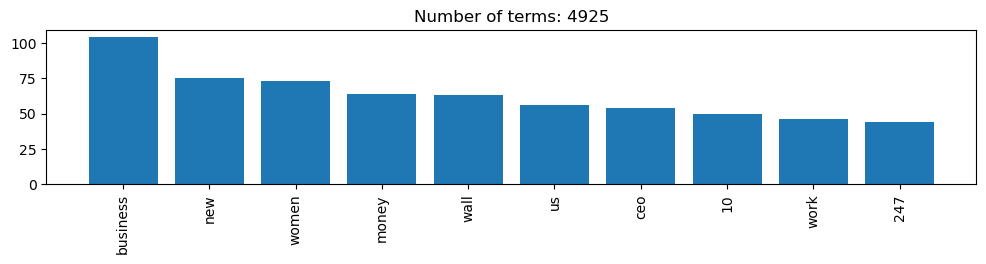

Most common word in category 'education':


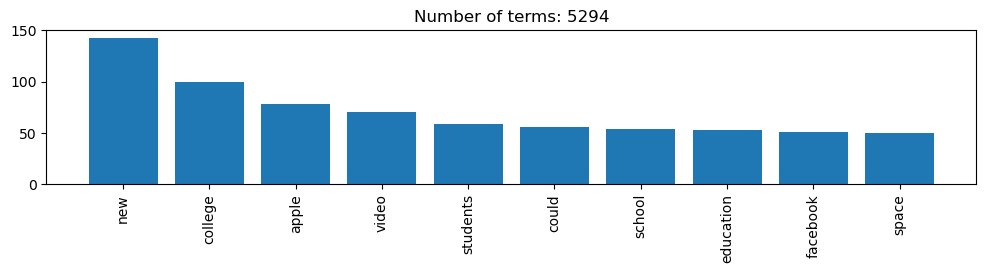

Most common word in category 'entertainment':


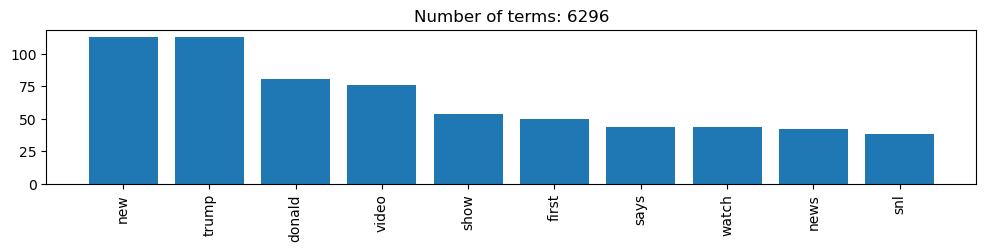

Most common word in category 'environment':


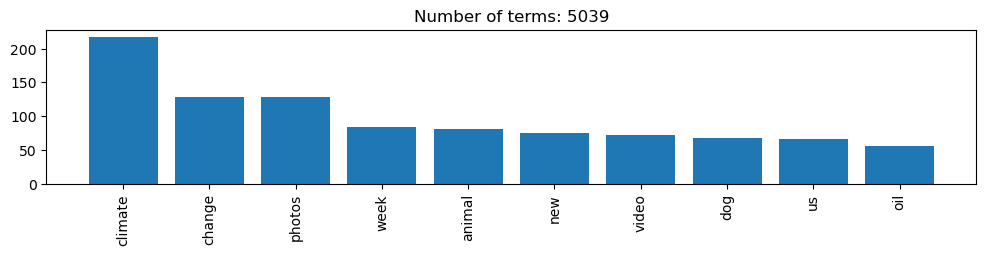

Most common word in category 'family':


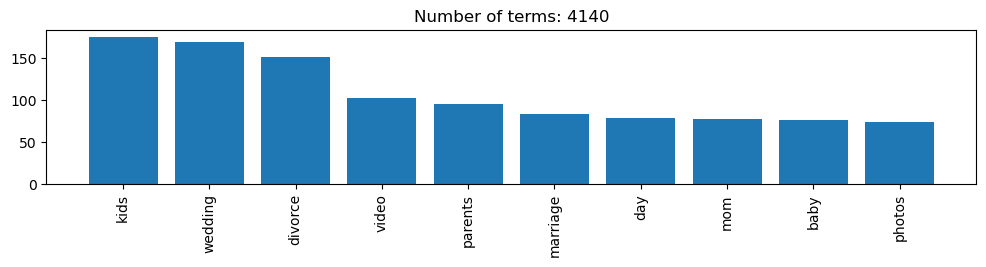

Most common word in category 'food':


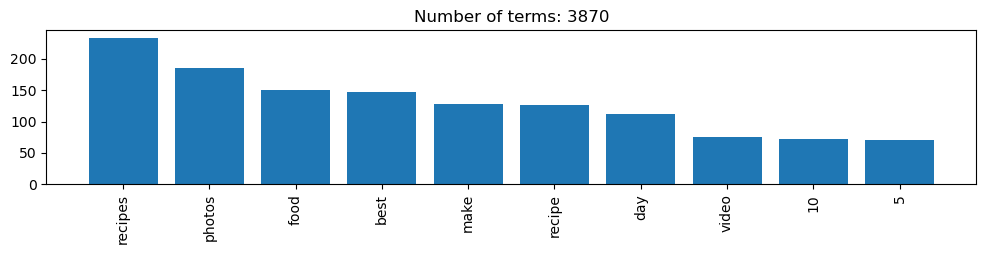

Most common word in category 'global':


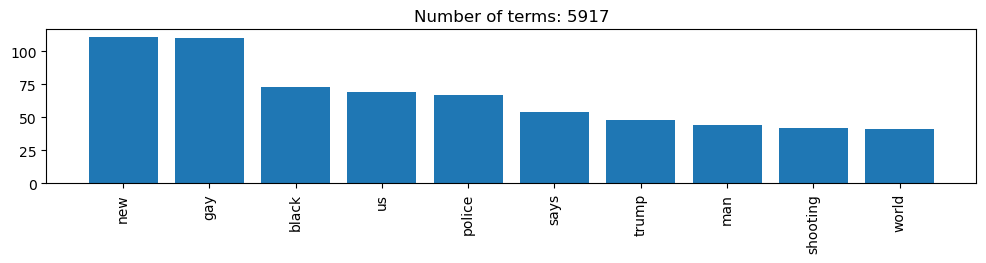

Most common word in category 'lifestyle':


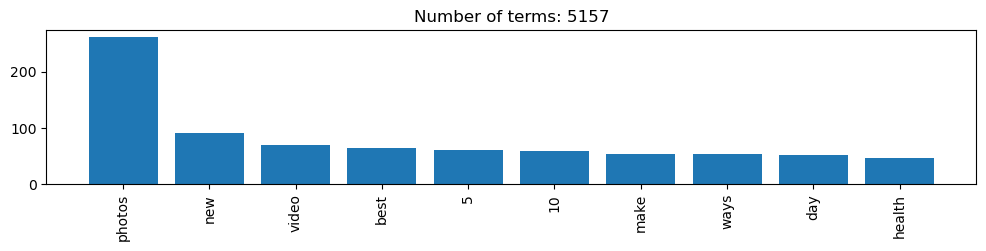

Most common word in category 'politics':


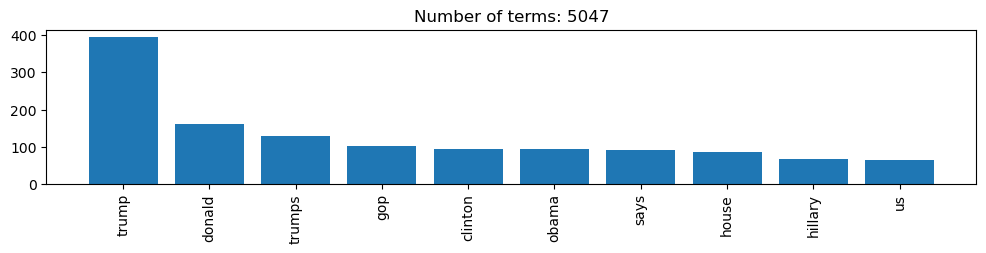

Most common word in category 'sports':


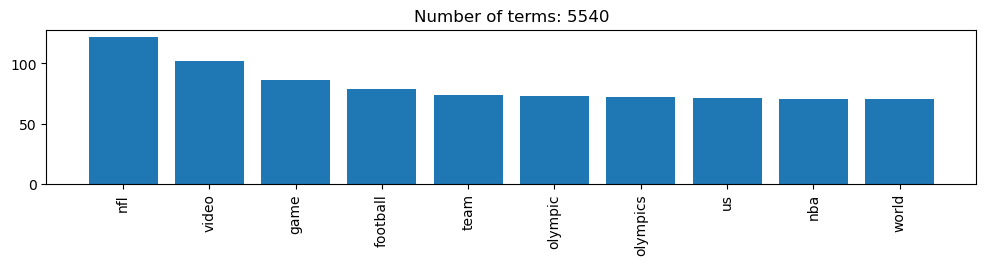

In [42]:
grouped = news.groupby('category')['tokenized_headline'].apply(list) #chatGPT help
for category, tokens in grouped.items():
    print(f"Most common word in category '{category}':")
    plot_words(tokens, top=10)

#### Category WordClouds

In [43]:
def plot_wordcloud(tokens): #chatgpt help
    flat_tokens = [token for sublist in tokens for token in sublist]
    text = ' '.join(flat_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Word cloud for category 'business':


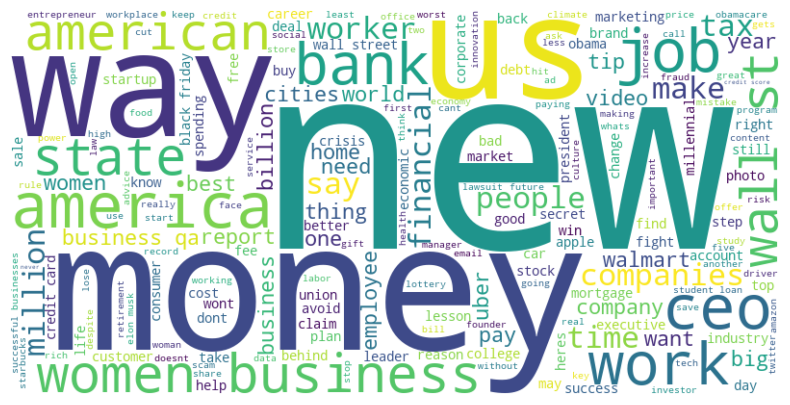

Word cloud for category 'education':


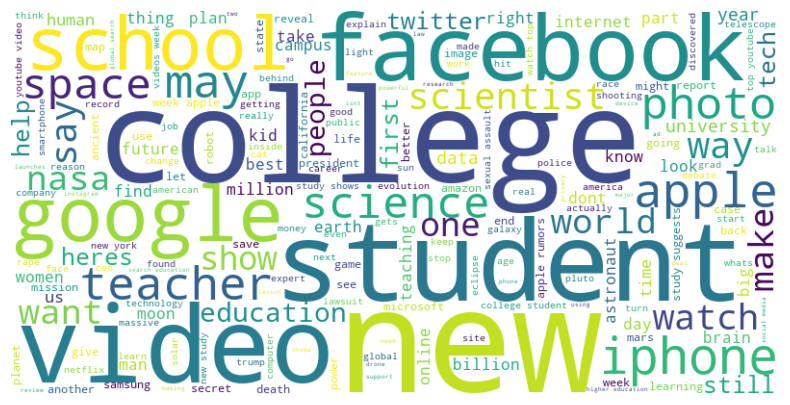

Word cloud for category 'entertainment':


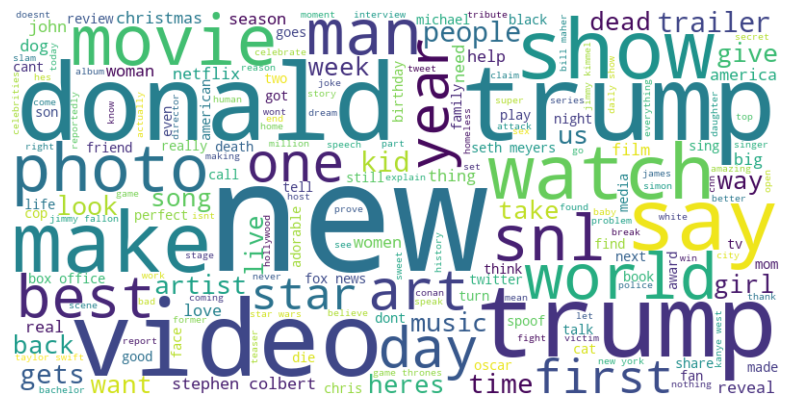

Word cloud for category 'environment':


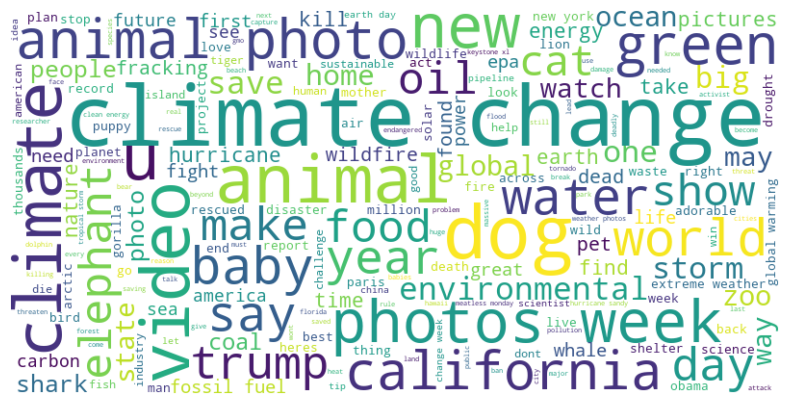

Word cloud for category 'family':


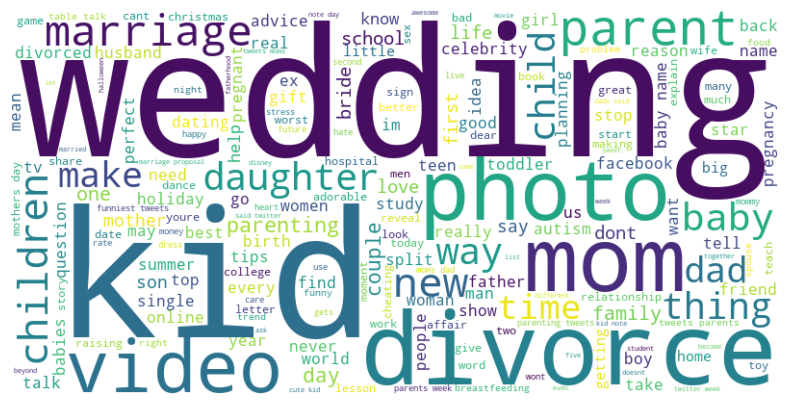

Word cloud for category 'food':


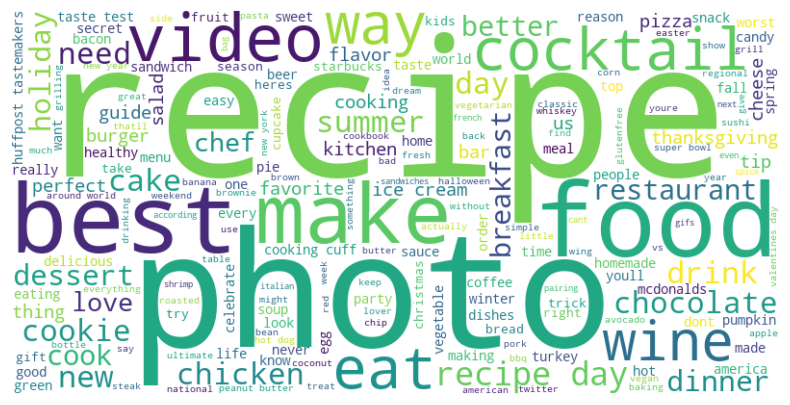

Word cloud for category 'global':


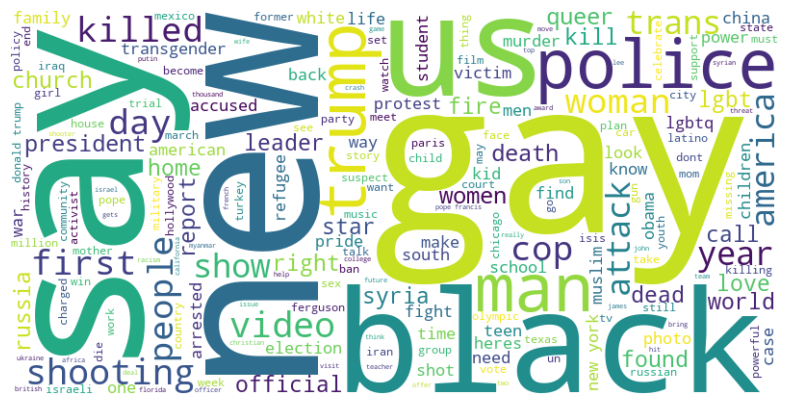

Word cloud for category 'lifestyle':


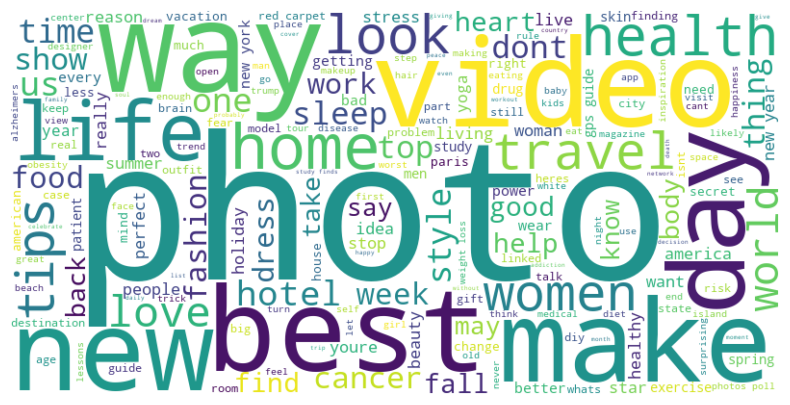

Word cloud for category 'politics':


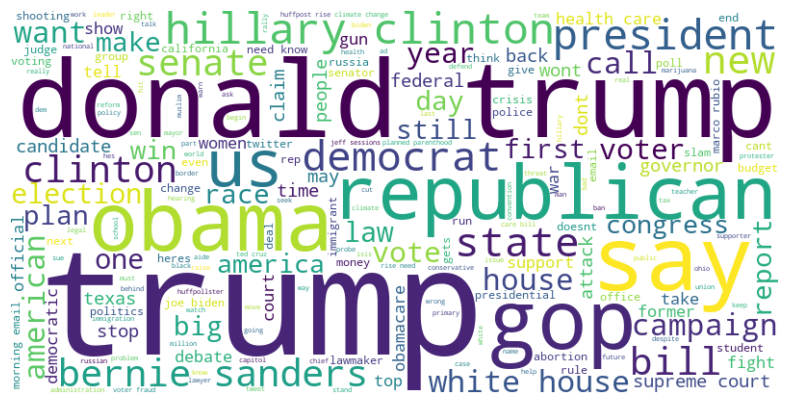

Word cloud for category 'sports':


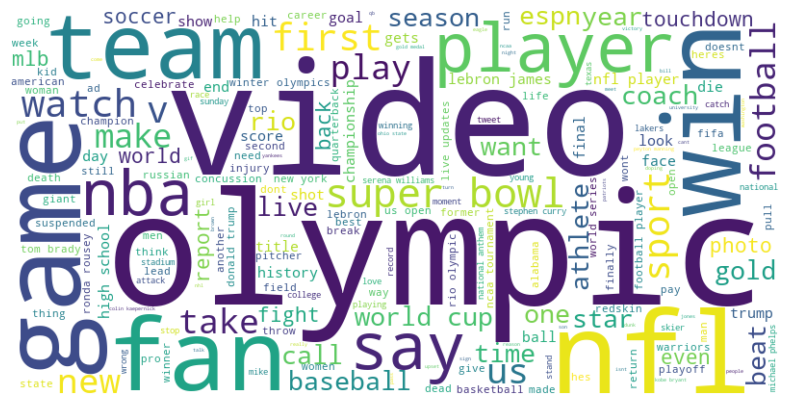

In [44]:
for category, tokens in grouped.items():
    print(f"Word cloud for category '{category}':")
    plot_wordcloud(tokens)

### Adding Parts of Speech

In [45]:
#From lab 8.5
def char_count(text):
    return len(text)

def word_count(text):
    words = text.split()
    return len(words)

def word_density(text):
    words = text.split()
    char_count = sum(len(word) for word in words)
    if len(words) == 0:
        return 0
    return char_count / len(words)

def title_word_count(text): #ChatGPT help to debug
    # Split the text into words
    words = text.split()
    
    # Check if there are any words in the list
    if len(words) > 0:
        # Assuming the first word of each review is the title
        title = words[0]
        return len(title)
    else:
        # Return 0 if the text is empty
        return 0
        
def uppercase_word_count(text):
    words = text.split()
    upper_count = sum(1 for word in words if word.isupper())
    return upper_count

In [46]:
news['char_count'] = news['headline'].apply(char_count)
news['word_count'] = news['headline'].apply(word_count)
news['word_density'] = news['headline'].apply(word_density)
news['title_count'] = news['headline'].apply(title_word_count)
news['uppercase_count'] = news['headline'].apply(uppercase_word_count)

In [47]:
news.sample()

link  \
62050  https://www.huffingtonpost.com/entry/huffpost-...   

                                                headline category  \
62050  HuffPost Rise: Here's What You Need To Know On...   global   

                                       short_description authors       date  \
62050  At least 84 people were killed in a horrific a...         2016-07-15   

       encoded_category                               tokenized_headline  \
62050                 3  [huffpost, rise, heres, need, know, july, 15th]   

                                   tokenized_description  char_count  \
62050  [least, 84, people, killed, horrific, attack, ...          56   

       word_count  word_density  title_count  uppercase_count  
62050          11      4.181818            8                0

In [48]:
nlp = spacy.load('en_core_web_sm')

In [49]:
def pos_counts(text): #from Mini project 3
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]
    pos_counts = Counter(pos_tags)
    return pos_counts

In [50]:
%%time 
#from mini project 3
for i, row in news.iterrows():
    text = row['headline']
    counts = pos_counts(text)
    
    news.at[i, 'adj_count'] = counts.get('ADJ', 0)
    news.at[i, 'adv_count'] = counts.get('ADV', 0)
    news.at[i, 'noun_count'] = counts.get('NOUN', 0)
    news.at[i, 'num_count'] = counts.get('NUM', 0)
    news.at[i, 'pron_count'] = counts.get('PRON', 0)
    news.at[i, 'propn_count'] = counts.get('PROPN', 0)  # 'PROPN' for proper nouns
    news.at[i, 'verb_count'] = counts.get('VERB', 0)

CPU times: total: 2min 10s
Wall time: 2min 14s


#### A sample of the parts of speech columns.

In [51]:
#from lab 8.5
cols = [
    'char_count', 'word_count', 'word_density', 'title_count',
    'uppercase_count', 'adj_count',
    'adv_count', 'noun_count', 'num_count',
    'pron_count', 'propn_count', 'verb_count']

news[cols].sample(10)

char_count  word_count  word_density  title_count  uppercase_count  \
2642            69          11      5.363636            2                0   
195331          22           3      6.666667            9                0   
62977           59           9      5.666667           14                1   
18894           55          10      4.600000            6                0   
80400           65          11      5.000000            6                2   
73104           15           3      4.333333            4                0   
181354          76          12      5.416667            8                1   
137434          51          11      3.727273            1                0   
48407           62          10      5.300000           13                2   
147883          21           3      6.333333            8                0   

        adj_count  adv_count  noun_count  num_count  pron_count  propn_count  \
2642          0.0        0.0         2.0        2.0         1.0          4.0   
195331        0.0        0.0         1.0        0.0         1.0          0.0   
62977         0.0        0.0         1.0        0.0         0.0          6.0   
18894         0.0        0.0         2.0        0.0         0.0          2.0   
80400         1.0        0.0         1.0        0.0         0.0          6.0   
73104         0.0        0.0         0.0        0.0         0.0          3.0   
181354        0.0        0.0         1.0        0.0         0.0          7.0   
137434        1.0        0.0         1.0        1.0         0.0          5.0   
48407         0.0        0.0         1.0        0.0         0.0          5.0   
147883        1.0        0.0         0.0        0.0         0.0          0.0   

        verb_count  
2642           1.0  
195331         1.0  
62977          0.0  
18894          1.0  
80400          1.0  
73104          0.0  
181354         1.0  
137434         0.0  
48407          1.0  
147883         1.0

#### Correlation heatmap of all the numeric columns

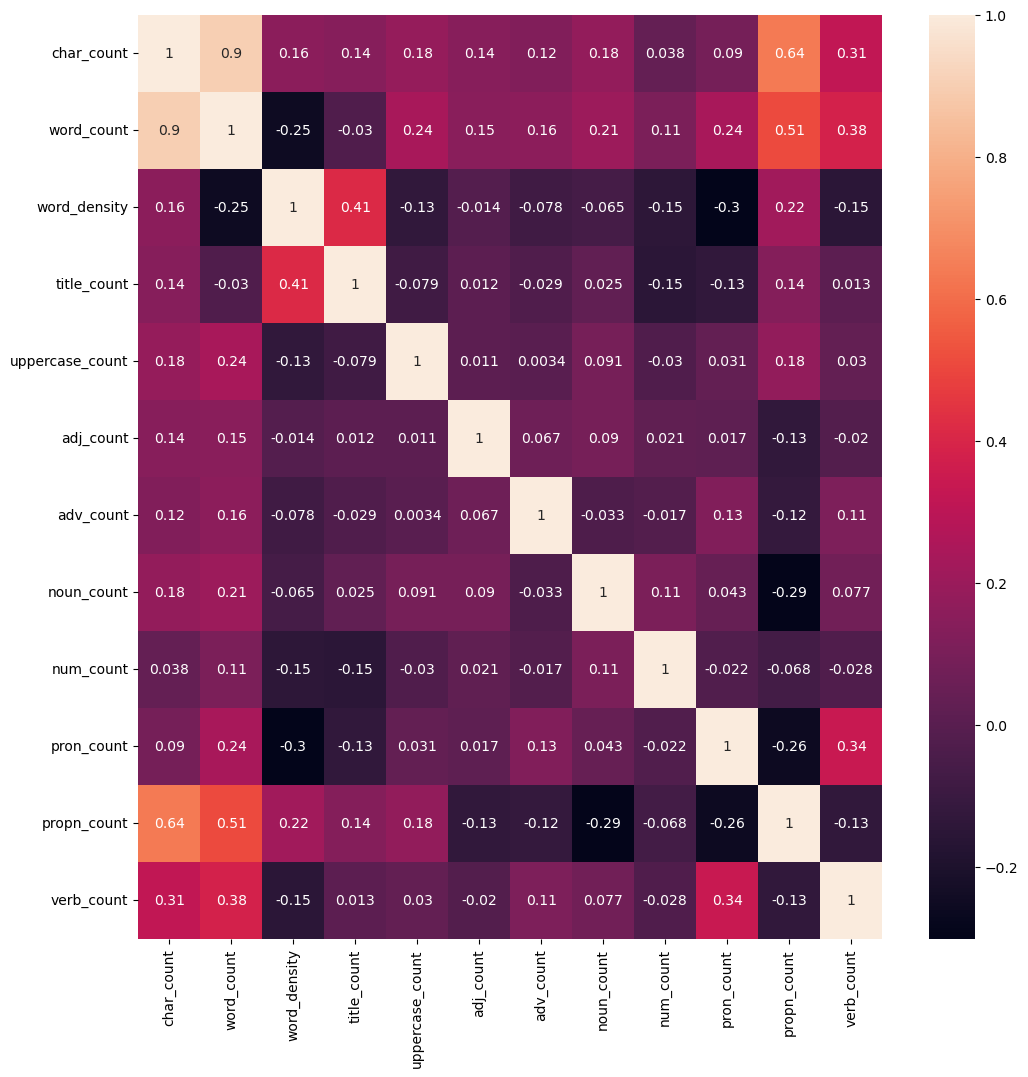

In [52]:
plt.figure(figsize=(12, 12))
sns.heatmap(news[cols].corr(), annot=True);

#### Category distribution by Year

In [53]:
news['year'] = news['date'].dt.year

In [54]:
#chatgpt help
category_counts_by_year = news.groupby(['year', 'category']).size().unstack(fill_value=0)

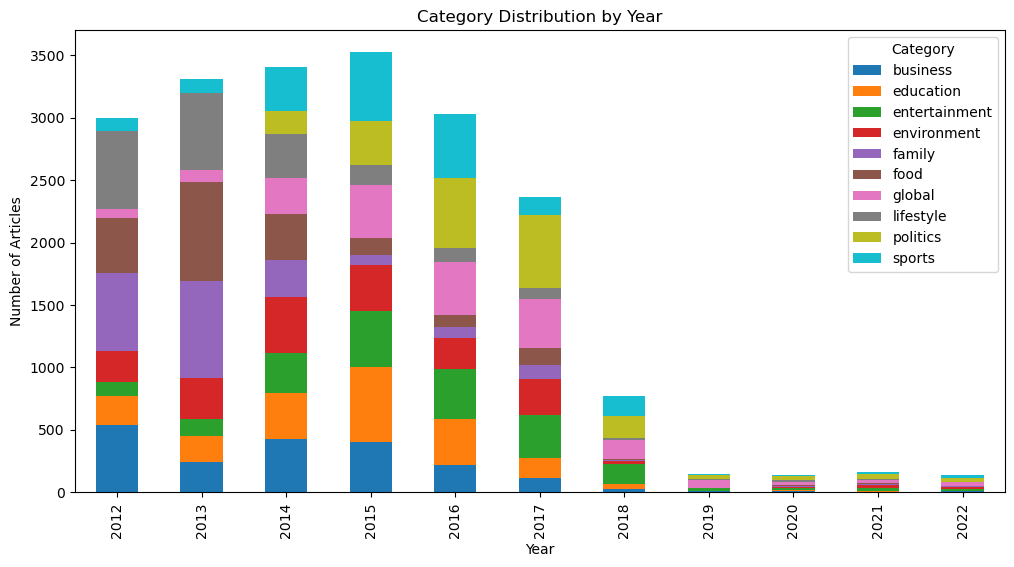

In [55]:
category_counts_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Category Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Category')
plt.show()

- Sports in 2016 has quite the significant amount of headlines due to the olympics.
- According to the information on Kaggle, there is only 10,000 headlines between 2018-2022, hence the little amount during those years.

#### Category Distribution by Month

To see if there were any seasonal trends to some topics.

In [57]:
news['month'] = news['date'].dt.month

In [58]:
category_counts_by_month = news.groupby(['month', 'category']).size().unstack(fill_value=0)

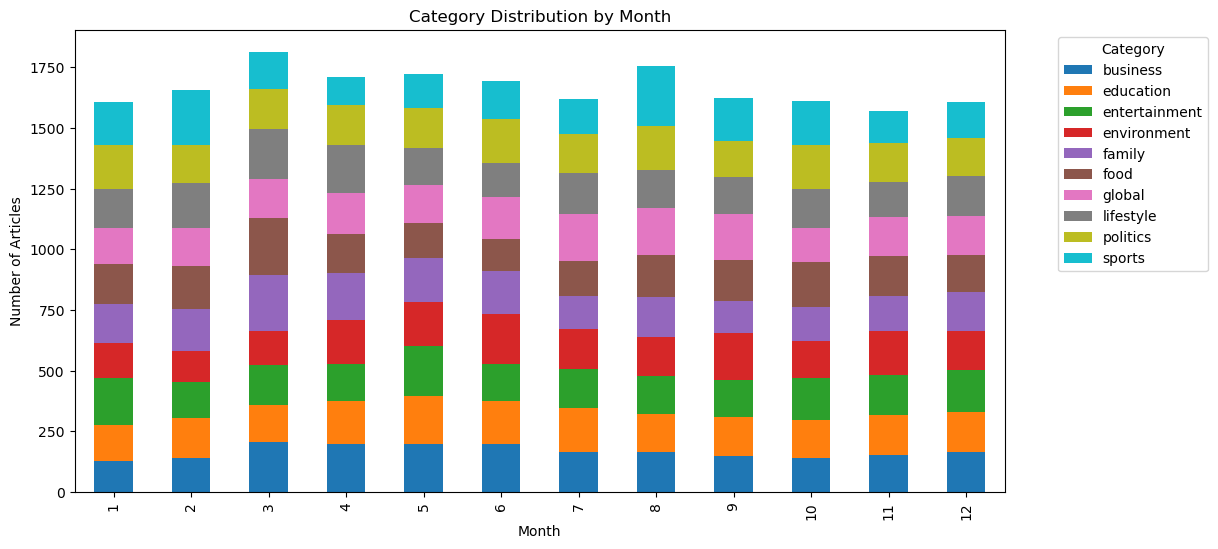

In [59]:
category_counts_by_month.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Category Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- The topics seem to be evenly distributed, which could be due to the way we samples 2000 headlines from each category.

#### Average word count of headlines by their category

In [61]:
average_word_count_by_category = news.groupby('category')['word_count'].mean()

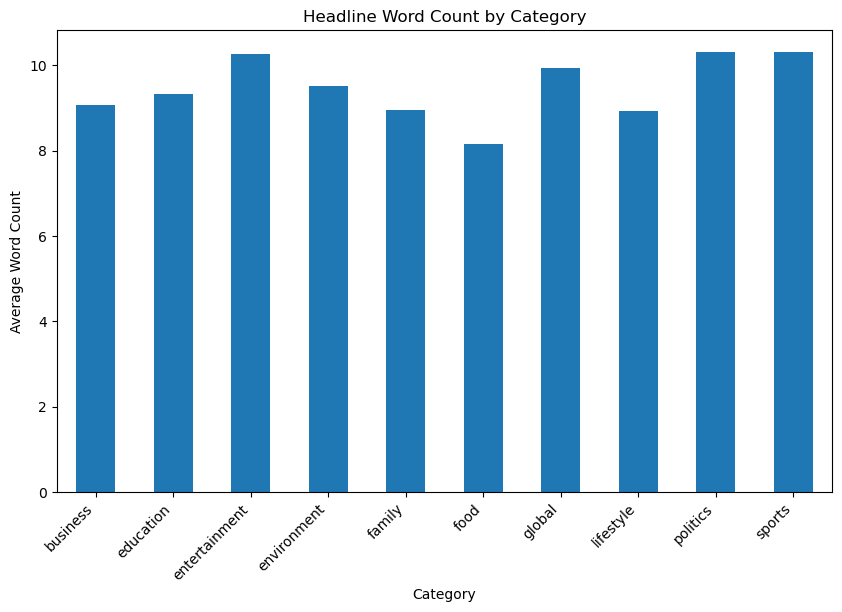

In [62]:
average_word_count_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Headline Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- The topics entertainment, politics, and sports average the most words per headline (average of 10 words per headline).

#### Exploring the Author feature

In [63]:
news

link  \
192604  https://www.huffingtonpost.com/entry/the-six-p...   
50653   https://www.huffingtonpost.com/entry/brazil-ri...   
122982  https://www.huffingtonpost.com/entry/doug-lock...   
85544   https://www.huffingtonpost.comhttp://blogs.ind...   
77972   https://www.huffingtonpost.com/entry/rev-al-sh...   
...                                                   ...   
118489  https://www.huffingtonpost.com/entry/what-are-...   
189895  https://www.huffingtonpost.com/entry/homemade-...   
155607  https://www.huffingtonpost.com/entry/clean-ble...   
149309  https://www.huffingtonpost.com/entry/americas-...   
152047  https://www.huffingtonpost.com/entry/accidenta...   

                                                 headline category  \
192604            Episode 100: Just the Beginning (AUDIO)   global   
50653   Deadly Police Helicopter Crash In Rio After Da...   global   
122982  WATCH: Touching New Music Video Shows Gay Coup...   global   
85544   A TV Series Based On 'Think Like A Man' Is In ...   global   
77972   Rev. Al Sharpton Blasts Oscars, Group Plans Bo...   global   
...                                                   ...      ...   
118489                      The Genius of Chinese Cooking     food   
189895  Homemade Ketchup Recipes: More Than Just Tomat...     food   
155607  Clean Blender In 30 Seconds, Thanks To CHOW Ti...     food   
149309               America's Coolest Breweries (PHOTOS)     food   
152047  Accidental Locavore: Lunch With Iron Chef Jose...     food   

                                        short_description  \
192604                                                      
50653             Four officers were killed in the crash.   
122982                                                      
85544   With a number of other past feature-length fil...   
77972   “Yet again, deserving black actors and directo...   
...                                                   ...   
118489  That a single tool, the cleaver, is used to sl...   
189895  French fries wouldn't be as popular if it were...   
155607           Guys, why didn't you tell us about this?   
149309  The last decade has brought a resurgence of cr...   
152047  How many times do you get invited to lunch wit...   

                                                  authors       date  \
192604  The Six Pack, Contributor\nRadio show hosted b... 2012-07-28   
50653                                                     2016-11-20   
122982                               JamesMichael Nichols 2014-08-19   
85544                                                     2015-10-21   
77972                                    Brennan Williams 2016-01-15   
...                                                   ...        ...   
118489  Quora, ContributorThe best answer to any question 2014-10-10   
189895                                                    2012-08-27   
155607                                                    2013-08-27   
149309  Travel + Leisure, Contributor\nTravelandLeisur... 2013-11-01   
152047                Anne Maxfield, Contributor\nFounder 2013-10-03   

        encoded_category                                 tokenized_headline  \
192604                 3                   [episode, 100, beginning, audio]   
50653                  3  [deadly, police, helicopter, crash, rio, day, ...   
122982                 3  [watch, touching, new, music, video, shows, ga...   
85544                  3  [tv, series, based, think, like, man, developm...   
77972                  3  [rev, al, sharpton, blasts, oscars, group, pla...   
...                  ...                                                ...   
118489                 5                         [genius, chinese, cooking]   
189895                 5       [homemade, ketchup, recipes, tomato, photos]   
155607                 5  [clean, blender, 30, seconds, thanks, chow, ti...   
149309                 5             [americas, coolest, breweries, photos]   
152047      

In [64]:
news['authors'].value_counts()
#3000 different authors

authors
                                                                                                 3981
Ron Dicker                                                                                        273
Reuters, Reuters                                                                                  253
Lee Moran                                                                                         246
Julie R. Thomson                                                                                  166
                                                                                                 ... 
Seth Berkley, M.D., ContributorCEO of Gavi, The Vaccine Alliance                                    1
Sebastian Ivory, ContributorSociology and politics and international affairs major at Wake...       1
Alexis Benveniste, ContributorJournalist and Editorial Outreach Coordinator in New York City        1
Michael Tuts, Contributor\nProfessor of Physics, Columbia University      

#### Top 10 most common authors

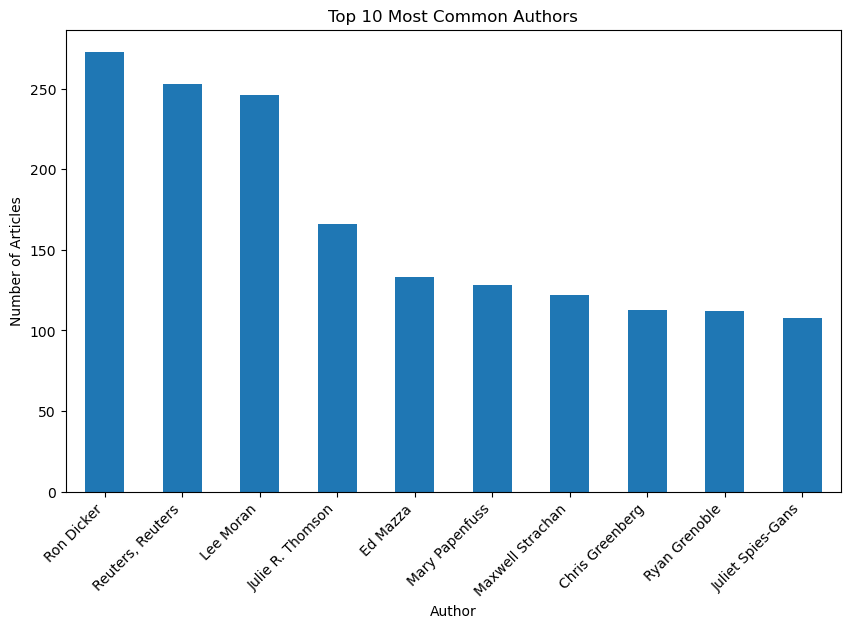

In [65]:
top_authors = news['authors'].value_counts() #chatGPT help
if top_authors.index[0] == '':
    top_authors = top_authors.iloc[1:] #because a lot of the author column is blank

# Extract the top 10 most common authors
top_authors = top_authors.head(10)

# Plot the 10 most common authors
top_authors.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Common Authors')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()

- These authors must be HuffPost employees.

#### What do the authors commmonly write about?

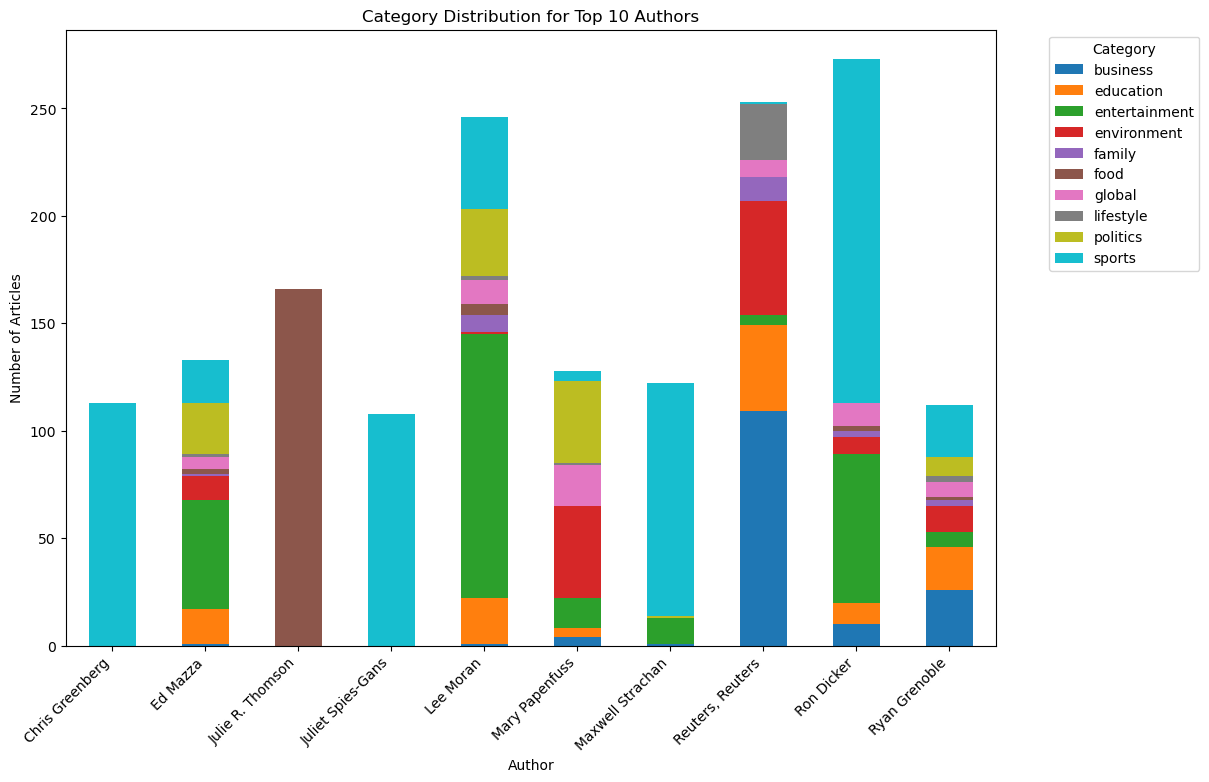

In [66]:
#chatgpt help
filtered_news = news[news['authors'].isin(top_authors.index)]

# Calculate the distribution of categories for each author
author_category_distribution = filtered_news.groupby(['authors', 'category']).size().unstack(fill_value=0)

# Plot the category distribution for each author
author_category_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Category Distribution for Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

- Julie R Thomson only writes about food.
- Lee Moran writes about a little bit of everything.
- Both Chris Greenberg and Juliet Spies-Gans exclusively talk about sports.

#### Export the dataset to CSV for use on the modelling notebook.

In [68]:
news.to_csv('news_dataset.csv', index=False)